Let's look at another question.What other information in a listing contributed to the price. Since from the last notebook, we can 
infer that there more factors other than time will contribute to the price. During this process, we will also clean the data, go through each column and decide to drop a few columns. 

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



/kaggle/input/calendar_Seattle.csv
/kaggle/input/listings_Boston.csv
/kaggle/input/reviews_Seattle.csv
/kaggle/input/reviews_Boston.csv
/kaggle/input/calendar_Boston.csv
/kaggle/input/listings_Seattle.csv


In [2]:
listing_Sea = pd.read_csv("/kaggle/input/listings_Seattle.csv")
listing_Sea.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


Clearly, this dataset "listings_Seattle.csv" contains all the general information about all the 3818 listings. There 92 columns. 30 of them are numerical columns. Other 62 are categorical columns. Here we will only focus on those numerical and clean categorical comlumns. That means this time we will ignore those descriptive features since each of them need special treatment and this is not the key point of this project. Note that we will also manually drop some columns due to different reasons. And you maybe aware how time-consuming the data cleaning process is. But this process will do us a favor later when we want to build a machine learning model on the dataset.

In [3]:
print(listing_Sea.shape)
print(listing_Sea.columns)
print("number of unique listing id is:",listing_Sea['id'].nunique())
print(listing_Sea.dtypes.value_counts())

(3818, 92)
Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'thumbnail_url', 'medium_url', 'picture_url',
       'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'am

We will clean all these features with currency or percentage sign and convert them into clean float numbers. And there 
are also some categorical variables can be converted into numerical variables by extracting some information. For instance, we can get the number of verifications of the host of each property.

In [4]:
listing_Sea['price'] = listing_Sea['price'].str.replace('[\$,]', '').astype('float')
listing_Sea['weekly_price'] = listing_Sea['weekly_price'].str.replace('[\$,]', '').astype('float')
listing_Sea['monthly_price'] = listing_Sea['monthly_price'].str.replace('[\$,]', '').astype('float')
listing_Sea['security_deposit'] = listing_Sea['security_deposit'].str.replace('[\$,]', '').astype('float')
listing_Sea['cleaning_fee'] = listing_Sea['cleaning_fee'].str.replace('[\$,]', '').astype('float')
listing_Sea['extra_people'] = listing_Sea['extra_people'].str.replace('[\$,]', '').astype('float')
listing_Sea['host_response_rate'] = listing_Sea['host_response_rate'].str.replace('[%]', '').astype('float')
listing_Sea['number_host_verifications']=listing_Sea['host_verifications'].apply(lambda x:x[1:-1]).str.split(",").apply(lambda x:len(x))

Firstly, let's take a look at those numerical columns' impact on price.Here we manually drop a few columns, one is because
it is completely identical to another column. Another is because it is totally NaN. 

In [5]:
numerical_columns = listing_Sea.select_dtypes(include=['int','float'])
print(numerical_columns.columns)

## manually drop the identical columns.
print("Whether 'host_listings_count' and 'host_total_listings_count' are identical?'",listing_Sea['host_listings_count'].equals(listing_Sea['host_total_listings_count']))
listing_Sea = listing_Sea.drop(['host_total_listings_count'],axis=1)
numerical_columns = numerical_columns.drop(['host_total_listings_count'],axis=1)

## manually drop the column that is total NaN.
all_NaN_columns = listing_Sea.columns[listing_Sea.isnull().sum()/listing_Sea.shape[0] == 1.0]
print("Those columns are all NaN:",all_NaN_columns)
listing_Sea= listing_Sea.drop(all_NaN_columns,axis=1)
numerical_columns= numerical_columns.drop(all_NaN_columns,axis=1)

## Drop other columns that will not have influence and indication on price.
listing_Sea = listing_Sea.drop(['id','scrape_id','host_id'],axis=1)
numerical_columns = numerical_columns.drop(['id','scrape_id','host_id'],axis=1)

numerical_columns.head(5)



Index(['id', 'scrape_id', 'host_id', 'host_response_rate',
       'host_listings_count', 'host_total_listings_count', 'latitude',
       'longitude', 'accommodates', 'bathrooms', 'bedrooms', 'beds',
       'square_feet', 'price', 'weekly_price', 'monthly_price',
       'security_deposit', 'cleaning_fee', 'guests_included', 'extra_people',
       'minimum_nights', 'maximum_nights', 'availability_30',
       'availability_60', 'availability_90', 'availability_365',
       'number_of_reviews', 'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'license', 'calculated_host_listings_count',
       'reviews_per_month', 'number_host_verifications'],
      dtype='object')
Whether 'host_listings_count' and 'host_total_listings_count' are identical?' True
Those columns are all NaN: Index(['license'], dtype='object')


,host_response_rate,host_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds,square_feet,price,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,reviews_per_month,number_host_verifications
0,96.0,3.0,47.636289,-122.371025,4,1.0,1.0,1.0,NaN,85.0,...,95.0,10.0,10.0,10.0,10.0,9.0,10.0,2,4.07,4
1,98.0,6.0,47.639123,-122.365666,4,1.0,1.0,1.0,NaN,150.0,...,96.0,10.0,10.0,10.0,10.0,10.0,10.0,6,1.48,6
2,67.0,2.0,47.629724,-122.369483,11,4.5,5.0,7.0,NaN,975.0,...,97.0,10.0,10.0,10.0,10.0,10.0,10.0,2,1.15,5
3,NaN,1.0,47.638473,-122.369279,3,1.0,0.0,2.0,NaN,100.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,5
4,100.0,2.0,47.632918,-122.372471,6,2.0,3.0,3.0,NaN,450.0,...,92.0,9.0,9.0,10.0,10.0,9.0,9.0,1,0.89,5


The figure below exhibits the correlation between price and all other numerical variables. Not surprisingly, all the variables indicating 
the scale of the property , like guests included, square feet of the property,and number of bedrooms,has very positive correlation with price. Weekyly price and monthly price are definitely proportional to the unit price, so we may need to exclude them in our models later. 

A few interesting points:
* Minimum and maximum nights have very small correlations with price.
* Number of reviews looks like have negative impact on the price. More reviews indicate lower prices.
* Generally, higher review scores on all the aspects indicate a higher price. But there is one exception, which is "reviews_scores_value".
* longitude has negative correlation with price, that may reflect the coumunity and environment's impact.
* Availability generally has negative effect on price.

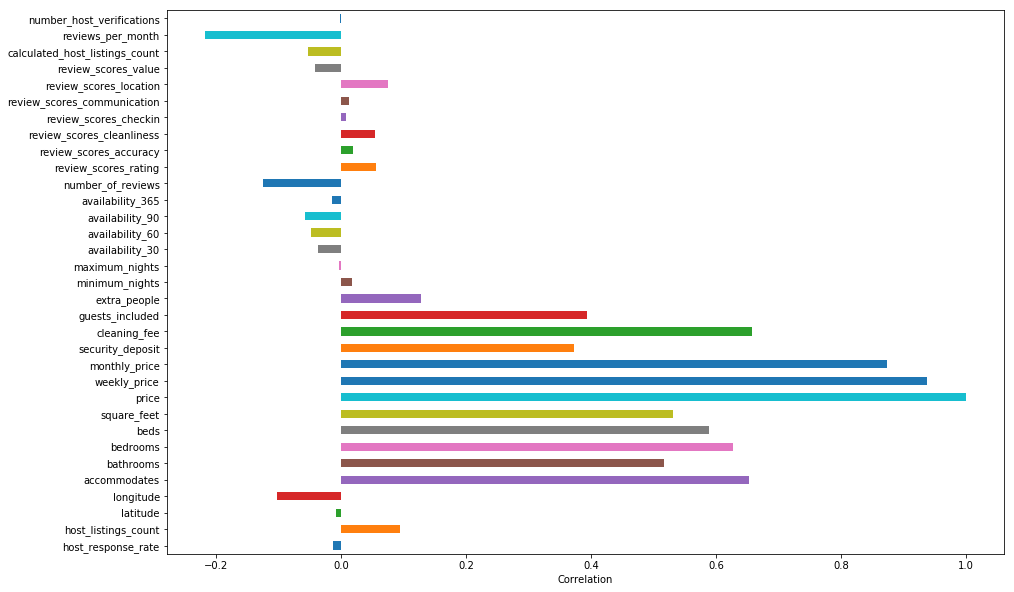

In [6]:
plt.figure(figsize=(15,10))
Corr_price = numerical_columns.corr()['price'][:]

Corr_price.plot.barh()
plt.xlabel("Correlation")
plt.show()

For those categorical variables, we need to drop those description columns. Here we define that a column is a description column
when it has more than 120 unique categories. We also need to delete those columns with only one value since they will not help at all 
in our model later.

In [7]:
Categorical_columns = listing_Sea.select_dtypes(include=['object'])
Descriptors = Categorical_columns.columns[(Categorical_columns.nunique() >120) | (Categorical_columns.nunique()==1)]
Categorical_columns = Categorical_columns.drop(Descriptors,axis=1)
listing_Sea = listing_Sea.drop(Descriptors,axis=1)


Also we need to manually delete the column "host_verifications","state","city", and "smart_location". The reason is: for "host_verifications", we already extract the information from it in the code above. For "state", it actually only has one category just because of capital case letters and lower case letters. The column "city" and "smart_location" actually do not provide many categories. Most of are the same and are showing different categories because of languages and format. Further, this geographical information has been included in some other columns like "neighbourhood" and "zipcode".

In [8]:
Categorical_columns = Categorical_columns.drop(['host_verifications','state','city','smart_location'],axis=1)
listing_Sea = listing_Sea.drop(['host_verifications','state','city','smart_location'],axis=1)
Categorical_columns.head()

,host_location,host_response_time,host_acceptance_rate,host_is_superhost,host_neighbourhood,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,zipcode,is_location_exact,property_type,room_type,bed_type,calendar_updated,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification
0,"Seattle, Washington, United States",within a few hours,100%,f,Queen Anne,t,t,Queen Anne,West Queen Anne,Queen Anne,98119,t,Apartment,Entire home/apt,Real Bed,4 weeks ago,f,moderate,f,f
1,"Seattle, Washington, United States",within an hour,100%,t,Queen Anne,t,t,Queen Anne,West Queen Anne,Queen Anne,98119,t,Apartment,Entire home/apt,Real Bed,today,f,strict,t,t
2,"Seattle, Washington, United States",within a few hours,100%,f,Queen Anne,t,t,Queen Anne,West Queen Anne,Queen Anne,98119,t,House,Entire home/apt,Real Bed,5 weeks ago,f,strict,f,f
3,"Seattle, Washington, United States",NaN,NaN,f,Queen Anne,t,t,Queen Anne,West Queen Anne,Queen Anne,98119,t,Apartment,Entire home/apt,Real Bed,6 months ago,f,flexible,f,f
4,"Seattle, Washington, United States",within an hour,NaN,f,Queen Anne,t,t,Queen Anne,West Queen Anne,Queen Anne,98119,t,House,Entire home/apt,Real Bed,7 weeks ago,f,strict,f,f


Now we can visualize the impact of some categorical variables on the price.

              label   avg_price
0         Apartment  122.932670
1   Bed & Breakfast  112.054054
2              Boat  282.375000
3          Bungalow  115.615385
4             Cabin  104.666667
5         Camper/RV  120.461538
6            Chalet   98.500000
7       Condominium  151.109890
8              Dorm   39.500000
9             House  132.351414
10             Loft  135.700000
11            Other   94.681818
12             Tent   54.000000
13        Townhouse  129.457627
14        Treehouse  101.000000
15             Yurt  100.000000


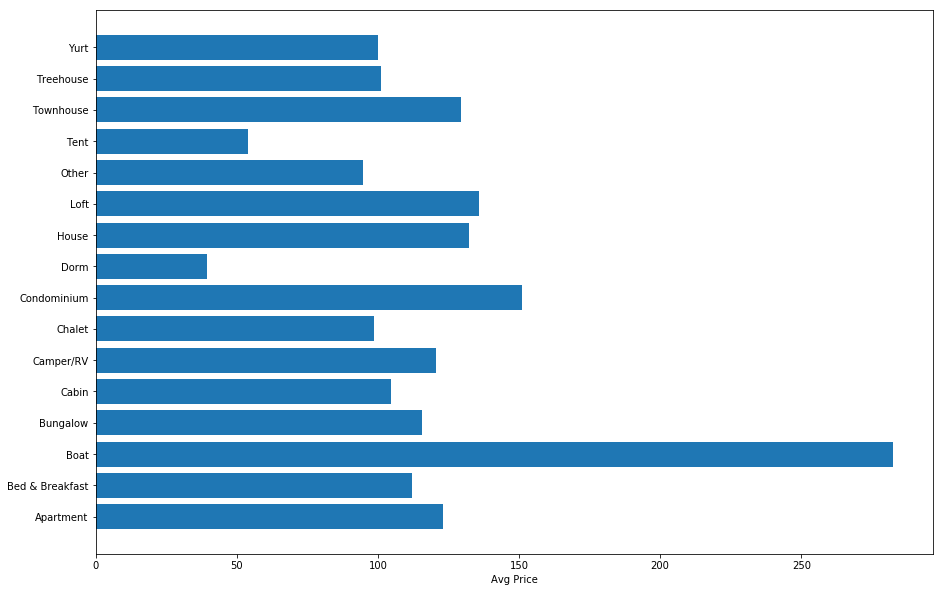

In [9]:
def Group_by_price(variable):
    '''
    INPUT:
    variable - the variable needed to group the data by and caculate the average price
    
    OUTPUT:
    stat - average price in each category in the input variable
    '''
    stat = listing_Sea.groupby(variable).agg({'price':'mean'})
    stat = stat.reset_index()
    stat.columns=['label','avg_price']
    return stat

## test the code
plt.figure(figsize=(15,10))
stat_property_type=Group_by_price('property_type')
plt.barh(stat_property_type['label'],stat_property_type['avg_price'],)
plt.xlabel("Avg Price")

print(stat_property_type)

           label   avg_price
0         Airbed   73.962963
1          Couch   64.307692
2          Futon   72.824324
3  Pull-out Sofa   77.276596
4       Real Bed  130.368882


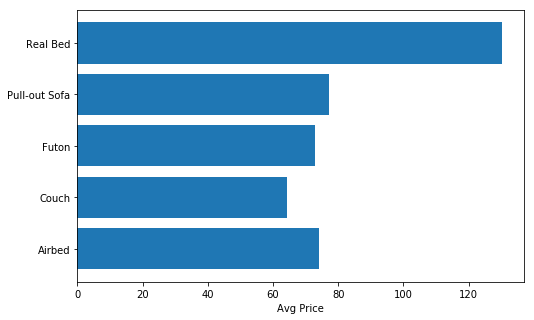

In [10]:
plt.figure(figsize=(8,5))
stat_bed_type =Group_by_price('bed_type')
plt.barh(stat_bed_type ['label'],stat_bed_type ['avg_price'],)
plt.xlabel("Avg Price")

print(stat_bed_type)

                label   avg_price
0  a few days or more  129.157895
1        within a day  132.819095
2  within a few hours  133.824380
3      within an hour  116.358747


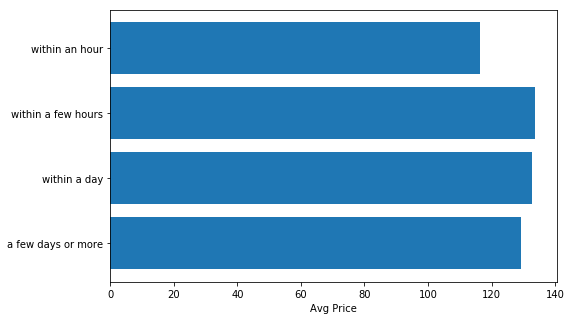

In [11]:
plt.figure(figsize=(8,5))
stat_host_response_time =Group_by_price('host_response_time')
plt.barh(stat_host_response_time['label'],stat_host_response_time['avg_price'],)
plt.xlabel("Avg Price")

print(stat_host_response_time)

Finally we need to save our cleaned data to a file for use in the model later.

In [12]:
print(listing_Sea.shape)
listing_Sea.to_csv("Listing_cleaned.csv")

(3818, 53)
